In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Data / Goal
The goal is to predict which the birthweight of a child, given number of weeks gestation, whether the mother was a smoker or not, and the mothers age. 

In [43]:
dataset = pd.read_csv('data\Birthweight.csv')
X = dataset[["Gestation", "smoker","mage"]].to_numpy()
y = dataset[["Birthweight"]].to_numpy()

## Exploratory Data Analysis
The diagrams below show scatter plots between the independent variables and dependent variable. As you can see there appears to be a relationship between Gestation in weeks and Birthweight, as well as Smoker and Birthweight. There are no obvious outliers.

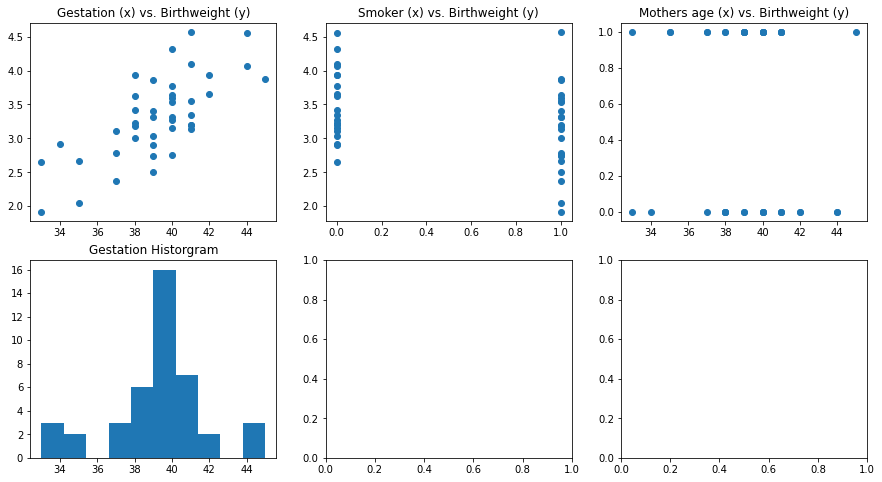

In [44]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize = (15,8))
ax1.scatter(X[:,0], y)
ax1.set_title("Gestation (x) vs. Birthweight (y)")
ax2.scatter(X[:,1], y)
ax2.set_title("Smoker (x) vs. Birthweight (y)")
ax3.scatter(X[:,0],X[:,1])
ax3.set_title("Mothers age (x) vs. Birthweight (y)")
ax4.hist(X[:,0])
ax4.set_title("Gestation Historgram")
plt.tight_layout
plt.show()

## Linear Regression
**Preprocessing**: No preprocessing is applied. The dataset is split into 75% training and 25% test.

**Approach**: Multiple linear regression attempts to explain the relationship between dependent variables and two or more independent variables with a linear relationship. The coefficients for each independent variable indicate how much variability in that feature influence variability in the dependent variable. We can test whether these coefficients are significantly different from 0, if it is not, then we can remove it without a significant impact on the models predictive ability. We can use the coefficient of determination to look how well the model explains variation in the dependent variable.

**Advantages/Disadvantages**: Linear regression is straight forward to compute, and easy to understand. Features can be pruned if their coefficients are not significant. The disadvantages are based around the assumptions it makes around the underlying data (linearity, random sampling, no perfect multicollinearity, normality) and the residuals (constant variance, no autocorrelation).

**Results**: R2 = 56.7% which is indicates a fairly weak model. The mothers age is not statistically significant (P-value is above 0.05), but whether the mothers smoke and gestation period are.

In [55]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)

X2 = sm.add_constant(X)
model = sm.OLS(y, X2)
model2 = model.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     16.49
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           5.08e-07
Time:                        14:50:25   Log-Likelihood:                -20.401
No. Observations:                  42   AIC:                             48.80
Df Residuals:                      38   BIC:                             55.75
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7721      1.005     -2.759      0.0

In [58]:
X_preds = sm.add_constant(X_test)
preds = model2.predict(X_preds)
mean_squared_error(y_test,predictions)

0.2417041839761474